<div style = "font-size: 20px">
    <h1><center>
        REGÜLARİZASYON
    </center></h1>
</div>

------------

# 1. Veri setini ve gerekli kütüphaneleri "import" edelim.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Lineer Regresyon için veri seti
data1 = pd.read_csv('Advertising.csv')

In [4]:
# Lojistik Regresyon için veri seti
data2 = pd.read_csv('diabetes.csv')

In [5]:
df_reg = data1.copy()

In [6]:
df_reg.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df_log = data2.copy()

In [8]:
df_log.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


-----------------

# 2. L2 Lineer Regresyon : Ridge Regresyon

<div style = "font-size: 16px">
    \begin{align}
    z =\ {w{}}_1x_1+{w{}}_2x_2+…+{w{}}_nx_n + b = Xw + b
    \end{align}
</div>

<div style = "font-size: 16px">
\begin{align}
      h_w(x) = z = a = \hat{y}
\end{align}
</div>  

<div style = "font-size: 16px">
   \begin{align}
   MSE{\hspace{2mm}Loss} : J(w)=\ \frac{1}{2m}\sum_{i=1}^m{(y^{(i)} - a^{(i)})}^2
   +{\frac{\lambda}{2m}}{\sum_{i=1}^n {w_j^2}}
   \end{align} 
</div>

<div style = "font-size: 16px">
   \begin{align}
    MSE{\hspace{2mm}Loss} : J(w) = \frac{1}{2m} np.sum((y - a)^2)
    +{\frac{\lambda}{2m}}np.sum(w^2)
   \end{align} 
</div>

<div style = "font-size: 16px">
   \begin{align}
    w :={w{}}+\frac{\alpha{}}{m}\sum_{i=1}^mx_{(i)}(y^{(i)} - a^{(i)})
   \end{align}  
</div>

<div style = "font-size: 16px">
   \begin{align}
    b :={b{}}+\frac{\alpha{}}{m}\sum_{i=1}^m(y^{(i)} - a^{(i)})
   \end{align}  
</div>

<div style = "font-size: 16px">
\begin{align}
      {dw} = - {{\frac{1}{m}}} X^{T} ({y-a)}
\end{align}
</div>   

<div style = "font-size: 16px">
\begin{align}
      {db} = - {{\frac{1}{m}}}np.sum({y-a)}
\end{align}
</div> 

<div style = "font-size: 16px">
\begin{align}
      {w} := {w}{(1 - \alpha \frac{\lambda}{m})} - \alpha({dw})
\end{align}
</div>  

<div style = "font-size: 16px">
\begin{align}
      {b} := {b} - {\alpha}({db})
\end{align}
</div>  

In [28]:
class batch_LinearRegression(object):
    # -------------------------------------------------------------------------------------
    def __init__(self, epochs = 1000, learning_rate = 0.01, L2_params = 0):
        self.epochs = epochs
        self.lr     = learning_rate
        self.L2     = L2_params
    # -------------------------------------------------------------------------------------    
    def fit(self, X, y):
        m, n        = X.shape
        self.w      = np.zeros((n, 1))
        self.b      = np.zeros(1)
        self.J_Hist = np.zeros(self.epochs)
        for epoch in range(self.epochs):
            Xw                 = np.dot(X, self.w)
            z                  = Xw + self.b
            a                  = z
            cost               = (1 / (2 * m)) * np.sum((y - a) ** 2)
            L2cost             = cost + (self.L2 / (2 * m)) * (np.sum(self.w ** 2))
            self.J_Hist[epoch] = L2cost
            dw                 = - (1 / m) * np.dot(X.T, (y - a))
            db                 = - (1 / m) * np.sum(y - a)
            self.w             = self.w * (1 - (self.lr * self.L2) / m) - self.lr * dw
            self.b             = self.b - self.lr * db
        self.coef_      = self.w
        self.intercept_ = self.b
    # -------------------------------------------------------------------------------------
    def predict(self, X):
        self.y_pred = np.dot(X, self.w) + self.b
        return self.y_pred

-------------------

# 3. L2 Lojistik Regresyon

<div style = "font-size: 16px">
\begin{align}
     sigmoid : h_w(x)= \frac{1}{(1+ e^{-(Xw+b)})} 
\end{align}
</div> 

<div style = "font-size: 16px">
\begin{align}
      {z} = {Xw} + b
\end{align}
</div> 

<div style = "font-size: 16px">
\begin{align}
     sigmoid : h_w(x)= \rho(z) = \frac{1}{(1+ e^{-z})} = a = \hat{y}
\end{align}
</div>   

<div style = "font-size: 16px">
\begin{align}
    LogLoss : J(w)={-}{\frac{1}{m}}
    \sum_{i=0}^m {[y^{(i)}{log(a^{(i)})+{(1-y^{(i)}){log(1-(a^{(i)})}})}]
    +{\frac{\lambda}{2m}}{\sum_{i=1}^n {w_j^2}}}   
\end{align}
</div>    

<div style = "font-size: 16px">
\begin{align}
    bernoulli1 = y^{T}log(a)
\end{align}
</div>   

<div style = "font-size: 16px">
\begin{align}
    bernoulli2 = (1 - y)^{T}log(1 - a)
\end{align}
</div>  

<div style = "font-size: 16px">
\begin{align}
    LogLoss : J(w)={-}{\frac{1}{m}}(bernoulli1 + bernoulli2)
    +{\frac{\lambda}{2m}}np.sum(w^2)
\end{align}
</div> 

<div style = "font-size: 16px">
\begin{align}
      {dw} = - {{\frac{1}{m}}} X^{T} ({y-a)}
\end{align}
</div>  

<div style = "font-size: 16px">
\begin{align}
      {db} = - {{\frac{1}{m}}}np.sum({y-a)}
\end{align}
</div>   

<div style = "font-size: 16px">
\begin{align}
      {w} := {w}{(1 - \alpha \frac{\lambda}{m})} - \alpha({dw})
\end{align}
</div>  

<div style = "font-size: 16px">
\begin{align}
      {b} := {b} - {\alpha}({db})
\end{align}
</div>  

In [29]:
class batch_Logistic(object):
    # -------------------------------------------------------------------------------------
    def __init__(self, epochs = 1000, learning_rate = 0.01, L2_params = 0):
        self.epochs = epochs
        self.lr     = learning_rate
        self.L2     = L2_params
    # -------------------------------------------------------------------------------------
    def fit(self, X, y):    
        m, n        = X.shape
        self.w      = np.zeros((n, 1))
        self.b      = np.zeros(1)
        self.J_Hist = np.zeros(self.epochs)
        for epoch in range(0, self.epochs):
            Xw                 = np.dot(X, self.w)
            z                  = Xw + self.b
            a                  = 1 / (1 + np.exp(-z))
            bernoulli_1        = np.dot(y.T, np.log(a))
            bernoulli_2        = np.dot((1 - y).T, np.log(1 - a))
            LogLoss            = - (1 / m) * (bernoulli_1 + bernoulli_2)
            L2LogLoss          = LogLoss + (self.L2 / (2 * m)) * np.sum(self.w ** 2)
            self.J_Hist[epoch] = L2LogLoss
            dw                 = - (1 / m) * np.dot(X.T, (y - a))
            db                 = - (1 / m) * np.sum(y - a)
            self.w             = self.w * (1 - (self.lr * self.L2) / m) - self.lr * dw
            self.b             = self.b - self.lr * db
        self.coef_      = np.reshape(self.w, (1, -1))
        self.intercept_ = self.b
    # -------------------------------------------------------------------------------------
    def predict(self, X):
        Xw          = np.dot(X, self.w)
        z           = Xw + self.b
        a           = 1 / (1 + np.exp(-z)) # sigmoid fonksiyonu
        self.y_pred = (a >= 0.5)
        return self.y_pred
    # -------------------------------------------------------------------------------------
    def accuracy(self, y, y_pred):
        return (y == y_pred).mean()

----------

# 4. Girdi matrisleri ve çıktı vektörleri

In [12]:
X_reg = df_reg.iloc[:, 1:-1].values
y_reg = df_reg.iloc[:, -1:].values

In [13]:
X_reg[:10]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2]])

In [14]:
y_reg[:10]

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6]])

In [15]:
X_log = df_log.iloc[:, :-1].values
y_log = df_log.iloc[:, -1:].values

In [16]:
X_log[:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [17]:
y_log[:10]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

----------

# 5. Girdi matrislerini normalize edelim.

In [18]:
sc1 = StandardScaler()
sc2 = StandardScaler()

In [19]:
X1_scaled = sc1.fit_transform(X_reg)

In [20]:
X2_scaled = sc2.fit_transform(X_log)

------------

# 6. Train - Test Split

In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y_reg, test_size = 0.2, random_state = 42)

In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y_log, test_size = 0.2, random_state = 42)

In [23]:
X1_train[:10]

array([[-0.36247947, -1.05093669, -0.34312114],
       [ 0.34981006, -0.942899  , -1.11185242],
       [-1.21372386,  0.23201095,  0.20926062],
       [-0.98952781, -0.72007125, -0.56407384],
       [ 0.89862331, -1.40881156, -0.68835974],
       [-1.27094056, -1.32103093, -0.771217  ],
       [-0.89260972, -0.49049114,  0.47164196],
       [ 0.0030068 ,  0.04294498, -0.52724839],
       [-0.49559588, -1.18598381,  0.17703835],
       [-0.82605152,  0.2860298 , -0.66994701]])

In [24]:
X2_train[:10]

array([[-5.47918591e-01, -1.15469351e+00, -3.57259724e+00,
        -1.28821221e+00, -6.92890572e-01, -4.06047387e+00,
        -5.07006355e-01, -1.04154944e+00],
       [ 1.53084665e+00, -2.78373437e-01,  6.66618252e-01,
         2.17261253e-01, -6.92890572e-01, -4.81351154e-01,
         2.44666971e+00,  1.42599540e+00],
       [-8.44885053e-01,  5.66649487e-01, -1.19450074e+00,
        -9.63790522e-02,  2.77897893e-02, -4.17891531e-01,
         5.50035182e-01, -9.56461683e-01],
       [-1.14185152e+00,  1.25518668e+00, -9.87709745e-01,
        -1.28821221e+00, -6.92890572e-01, -1.28094240e+00,
        -6.58012289e-01,  2.70231170e+00],
       [ 6.39947260e-01,  4.10163760e-01,  5.63222752e-01,
         1.03272605e+00,  2.51978092e+00,  1.80319526e+00,
        -7.06334188e-01,  1.08564439e+00],
       [-8.44885053e-01,  2.84975179e-01,  4.62452528e-02,
        -4.72747419e-01,  2.18813500e-01, -7.73265418e-01,
         3.73582388e-04, -9.56461683e-01],
       [ 4.60143347e-02,  3.475694

----------

# 7. L2 Lineer Regresyon ile hesaplamalar

In [30]:
regression = batch_LinearRegression(epochs = 100, learning_rate = 0.1)

In [31]:
L2_regression = batch_LinearRegression(epochs = 100, learning_rate = 0.1, L2_params = 20)

## 7.a. L2 = 0

In [32]:
regression.fit(X1_train, y1_train)

In [33]:
y_pred1_train = regression.predict(X1_train)

In [34]:
y_pred1_test = regression.predict(X1_test)

In [35]:
regression.J_Hist[-10:]

array([1.35258311, 1.35258104, 1.35257921, 1.35257759, 1.35257615,
       1.35257488, 1.35257374, 1.35257274, 1.35257185, 1.35257106])

In [36]:
np.sqrt(mean_squared_error(y1_train, y_pred1_train))

1.644731195085523

In [37]:
np.sqrt(mean_squared_error(y1_test, y_pred1_test))

1.781999981023688

In [38]:
r2_score(y1_train, y_pred1_train)

0.8957003921504669

In [39]:
r2_score(y1_test, y_pred1_test)

0.8993928271438222

## 7.b. L2 = 20

In [40]:
L2_regression.fit(X1_train, y1_train)

In [41]:
y_pred1_L2_train = L2_regression.predict(X1_train)

In [42]:
y_pred1_L2_test = L2_regression.predict(X1_test)

In [43]:
L2_regression.J_Hist[-10:]

array([2.6011407 , 2.60114042, 2.60114018, 2.60113998, 2.60113981,
       2.60113967, 2.60113955, 2.60113945, 2.60113936, 2.60113929])

In [44]:
np.sqrt(mean_squared_error(y1_train, y_pred1_L2_train))

1.7280230449221405

In [45]:
np.sqrt(mean_squared_error(y1_test, y_pred1_L2_test))

1.9558962598477725

In [46]:
r2_score(y1_train, y_pred1_L2_train)

0.8848691062207533

In [47]:
r2_score(y1_test, y_pred1_L2_test)

0.8787992834533772

## 7.c. Maliyet Grafiği Kıyaslama

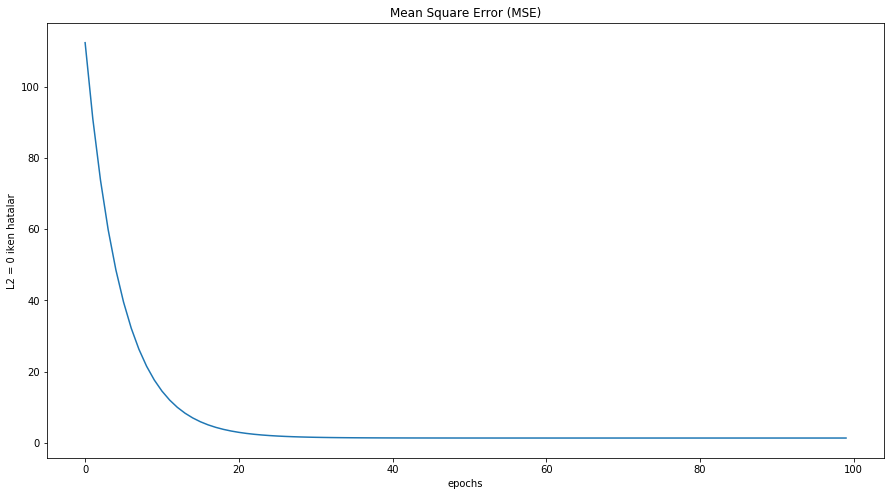

In [48]:
plt.plot(range(100), regression.J_Hist)
plt.title('Mean Square Error (MSE)')
plt.xlabel('epochs')
plt.ylabel('L2 = 0 iken hatalar')
plt.gcf().set_size_inches(15, 8);
plt.show();

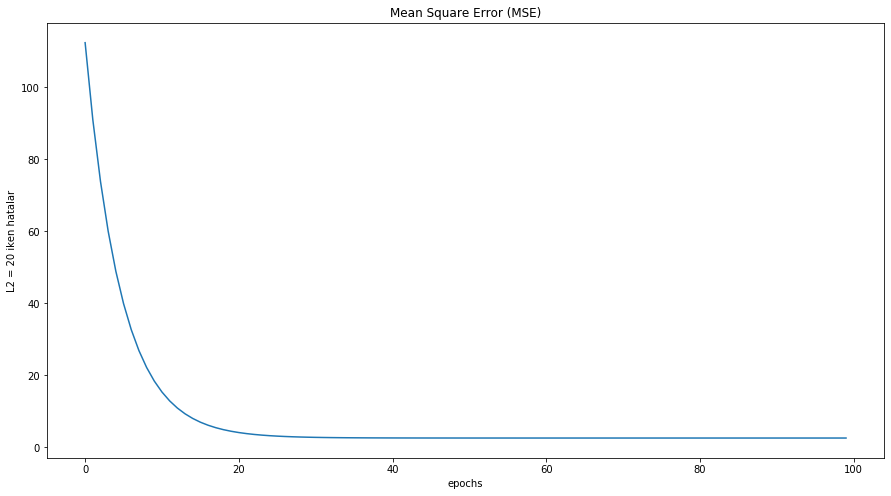

In [49]:
plt.plot(range(100), L2_regression.J_Hist)
plt.title('Mean Square Error (MSE)')
plt.xlabel('epochs')
plt.ylabel('L2 = 20 iken hatalar')
plt.gcf().set_size_inches(15, 8);
plt.show();

-----------

# 8. L2 Lojistik Regresyon ile Hesaplamalar

In [54]:
logistic = batch_Logistic(epochs = 100, learning_rate = 0.1)

In [55]:
L2_logistic = batch_Logistic(epochs = 100, learning_rate = 0.1, L2_params = 20)

## 8.a. L2 = 0

In [56]:
logistic.fit(X2_train, y2_train)

In [57]:
y_pred2_train = logistic.predict(X2_train)

In [58]:
y_pred2_test = logistic.predict(X2_test)

In [59]:
logistic.J_Hist[-10:]

array([0.48263412, 0.48234212, 0.48205703, 0.48177865, 0.48150679,
       0.48124125, 0.48098186, 0.48072844, 0.48048082, 0.48023885])

In [60]:
logistic.accuracy(y2_train, y_pred2_train)

0.7687296416938111

In [61]:
logistic.accuracy(y2_test, y_pred2_test)

0.7337662337662337

## 8.b. L2 = 20

In [62]:
L2_logistic.fit(X2_train, y2_train)

In [63]:
y_pred2_L2_train = L2_logistic.predict(X2_train)

In [64]:
y_pred2_L2_test = L2_logistic.predict(X2_test)

In [65]:
L2_logistic.J_Hist[-10:]

array([0.50137974, 0.50120079, 0.50102723, 0.50085889, 0.50069559,
       0.50053717, 0.50038346, 0.50023431, 0.50008957, 0.49994909])

In [66]:
L2_logistic.accuracy(y2_train, y_pred2_L2_train)

0.7638436482084691

In [68]:
L2_logistic.accuracy(y2_test, y_pred2_L2_test)

0.7532467532467533

## 8.c. Logaritmik Kaybı Kıyaslama

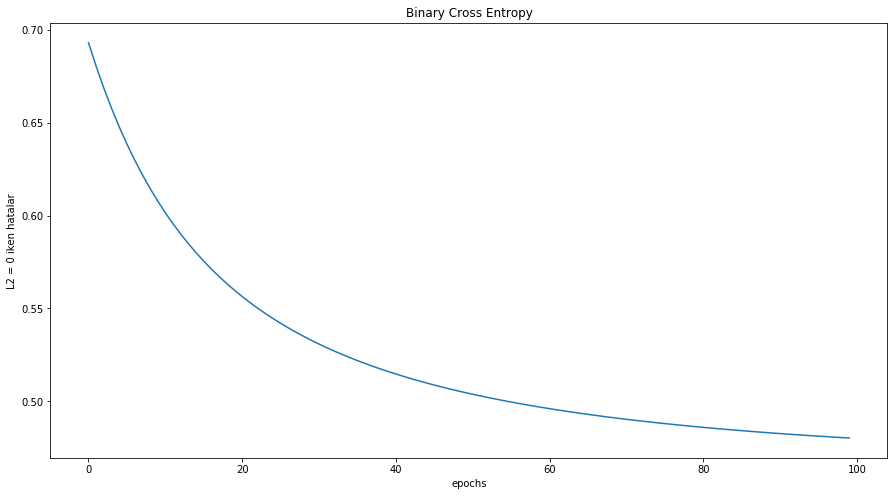

In [69]:
plt.plot(range(100), logistic.J_Hist)
plt.title('Binary Cross Entropy')
plt.xlabel('epochs')
plt.ylabel('L2 = 0 iken hatalar')
plt.gcf().set_size_inches(15, 8);
plt.show();

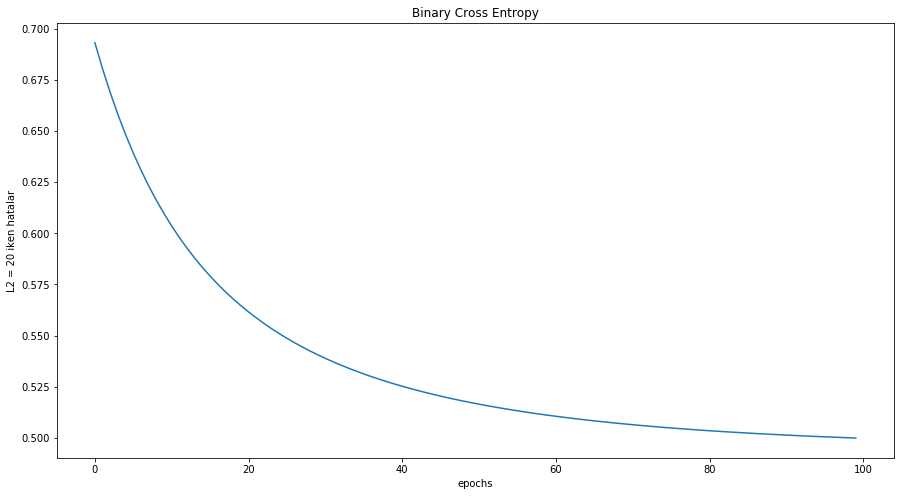

In [70]:
plt.plot(range(100), L2_logistic.J_Hist)
plt.title('Binary Cross Entropy')
plt.xlabel('epochs')
plt.ylabel('L2 = 20 iken hatalar')
plt.gcf().set_size_inches(15, 8);
plt.show();

--------

# 9. Optimize Kodlar

In [71]:
# C = 1 / lambda(L2)
1 / 20

0.05

In [73]:
ridge = Ridge(alpha = 20, max_iter = 100)
log   = LogisticRegression(max_iter = 100, solver = 'liblinear')
l2log = LogisticRegression(max_iter = 100, solver = 'liblinear', penalty = 'l2', C = 0.05)

In [74]:
ridge.fit(X1_train, y1_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [75]:
log.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
l2log.fit(X2_train, y2_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred_test_ridge = ridge.predict(X1_test)

In [78]:
y_pred_test_log = log.predict(X2_test)

In [79]:
y_pred_test_L2log = l2log.predict(X2_test)

In [80]:
np.sqrt(mean_squared_error(y1_test, y_pred_test_ridge))

1.9557948517072228

In [81]:
accuracy_score(y2_test, y_pred_test_log)

0.7532467532467533

In [82]:
accuracy_score(y2_test, y_pred_test_L2log)

0.7467532467532467

-------------